<a href="https://colab.research.google.com/github/bluesky0960/AI_Study/blob/master/Conditional_AutoEncoder_Conv(Tensorflow_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 조건부 오토인코더 (TensorFlow 2)
텐서플로우 2에서 제공하는 고수준 API인 케라스를 이용해, 오토인코더(autoencoder)를 구현한다.
* Google Colab 환경에서 사용하는 경우에  초점을 맞춤.
* 텐서플로우 2
* 텐서플로우 2 내장 케라스 기준

참고문헌
* [TensorFlow 소개](https://www.tensorflow.org/learn)
* [TensorFlow > 학습 > TensorFlow Core > 가이드 > 케라스: 빠르게 훑어보기](https://www.tensorflow.org/guide/keras/overview)
* [Deep Learning with Python, by Francois Chollet](https://github.com/fchollet/deep-learning-with-python-notebooks)


주의사항
* Colab에서 코드에 이상이 없음에도 불구하고 결과가 제대로 나오지 않을 경우, '런타임 다시 시작...'을 해보도록 한다.'


## Deep Neural Network 기초
다음 비디오를 보고 심층신경망(deep neural network) 기반 딥러닝 기법은 이해하도록 한다.
* [신경망이란 무엇인가? | 1장.딥러닝에 관하여 (3Blue1Brown)](https://youtu.be/aircAruvnKk)
* [경사 하강, 신경 네트워크가 학습하는 방법 | 심층 학습, 2장 (3Blue1Brown)](https://youtu.be/IHZwWFHWa-w)
* [What is backpropagation really doing? | Deep learning, chapter 3 (3Blue1Brown)](https://youtu.be/Ilg3gGewQ5U)
* [Backpropagation calculus | Deep learning, chapter 4 (3Blue1Brown)](https://youtu.be/tIeHLnjs5U8)


## Tensorflow 2과 Keras를 사용하기 위한 구성
```
import tensorflow as tf                       # 텐서플로우 임포트
from tensorflow.keras import models, layers   # 케라스 관련 모듈 임포트
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)        # 텐서플로우 버전을 확인하도록 한다.
print(tf.keras.__version__)  # 케라스 버전을 확인한다.
```

In [0]:
import tensorflow as tf                       # 텐서플로우 임포트
from tensorflow.keras import models, layers   # 케라스 관련 모듈 임포트
import numpy as np
import matplotlib.pyplot as plt
 
print(tf.__version__)        # 텐서플로우 버전을 확인하도록 한다.
print(tf.keras.__version__)  # 케라스 버전을 확인한다.


2.2.0-rc3
2.3.0-tf


## MNIST 데이터셋 띄우기
* mnist 데이터셋은 LeCun이 만든 숫자(digit) 손글씨 데이터셋이다.
* 60,000개의 트레이닝 데이터와 10,000개의 테스트 데이터로 이루어져 있다.


### MNIST 이미지 데이터
* 트레이닝 이미지와 테스트 이미지에 들어 있는 영상은 3차원 텐서이다.
  + 트레이닝 이미지의 경우, shape = (60000, 28, 28)
  + 테스트 이미지의 경우, shape=(10000, 28, 28)
* 3차원 텐서는 다음의 의미로 구성되어 있음을 유념하자.
  + (# of images, image Height, image Width)  혹은 (# of images, # of Rows, # of Columns)  
* 각 영상은 28 x 28 크기로 구성되어 있다.
* 각 픽셀은 [0, 255] 사이의 uint8형 값이다.
  + 반드시, 텐서플로우에 입력으로 넣을 때, 픽셀값을 [0, 1] 사이의 float64형 값으로 변환하도록 하자.


### MNIST 라벨 데이터
* 각 라벨은 [0, 9] 사이의 unit8형 값이다.

In [0]:
# MNIST 데이터 로딩
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print('train_images의 *원래* 데이터의 shape과 dype:', 
      train_images.shape, train_images.dtype)
print('test_images의 *원래* 데이터의 shape과 dype:', 
      test_images.shape, test_images.dtype)

# Normalizing the images to the range of [0., 1.]
train_images = tf.cast(train_images, tf.float32)
test_images  = tf.cast(test_images, tf.float32)
train_images /= 255
test_images  /= 255

print('train_images의 *바뀐* 데이터의 shape과 dype:', 
      train_images.shape, train_images.dtype)
print('test_images의 *바뀐* 데이터의 shape과 dype:', 
      test_images.shape, test_images.dtype)

# Print out for checking
print(train_images[0].shape)
print(train_images[0][0][0].dtype)
print(train_labels.dtype)
print(train_labels.shape)

train_images의 *원래* 데이터의 shape과 dype: (60000, 28, 28) uint8
test_images의 *원래* 데이터의 shape과 dype: (10000, 28, 28) uint8
train_images의 *바뀐* 데이터의 shape과 dype: (60000, 28, 28) <dtype: 'float32'>
test_images의 *바뀐* 데이터의 shape과 dype: (10000, 28, 28) <dtype: 'float32'>
(28, 28)
<dtype: 'float32'>
uint8
(60000,)


In [0]:
num_classes = 10

train_label_onehots = tf.keras.utils.to_categorical(train_labels, num_classes)
test_label_onehots  = tf.keras.utils.to_categorical(test_labels, num_classes)

# 데이터 변환 확인
print(train_label_onehots.shape)
print(test_label_onehots.shape)

print(train_label_onehots[0])
print(train_labels[0])
print(test_label_onehots[0])
print(test_labels[0])


(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7


## 네트워크 모델 설계
* 인코더 모델
  + InputLayer로 (28,28) 영상과 (10,) 영상의 라벨 원 핫코드를 받고, 출력으로 n_dim차원 벡터가 나오도록 함.
* 디코더 모델
  + InputLayer에서 n_dim차원 벡터를 받고, 출력으로 (28,28) 영상이 나오도록 함.
* 오토인코더 모델: 인코더, 디코더를 결합하여 설계

* n_dim=2로 설계한다

In [0]:
n_dim = 2

#Condition을 반영하기 위해 Input data 가공
* Conv2D를 사용하기 위해 input으로 들어온 img를 reshape해서 축을 추가해준다
 + img(28,28) -> (28,28,1)
* Conditional AutoEncoder를 만들기 위해서는 Condition을 픽셀마다 적용해야 한다.
 + input으로 들어온 con(10,)의 차원을 reshape로 img의 차원에 맞춰준다.
   + (10,) -> (1,1,10)
 + Upsampling2((28,28))를 이용해 con(1,1,10)의 크기를 img에 맞춰준다
   + (1,1,10) -> (28,28,10)
* 그 후 img(28,28,1)과 con(28,28,10)을 Concat하여 사용한다.
 + (28,28,1) + (28,28,10) -> (28,28,11)

In [0]:

img = tf.keras.Input(shape=(28,28)) # TF 1.x의 placeholder 역할
con = tf.keras.Input(shape=(10,))   # TF 1.x의 placeholder 역할

enc_conv_1 = tf.keras.layers.Conv2D(8,(2,2), activation='relu', padding='same')
enc_conv_2 = tf.keras.layers.Conv2D(16,(2,2), activation='relu', padding ='same')

enc_maxpool_1 = tf.keras.layers.MaxPooling2D((2,2), padding='same')
enc_maxpool_2 = tf.keras.layers.MaxPooling2D((2,2), padding='same')

enc_dense_1 = tf.keras.layers.Dense(256, activation='relu')
enc_dense_2 = tf.keras.layers.Dense(n_dim)

enc_reshape = tf.keras.layers.Reshape((28,28,1))
con_reshape = tf.keras.layers.Reshape((1,1,10))

enc_upsampling = tf.keras.layers.UpSampling2D((28,28))

enc_img = enc_reshape(img)                            # img(28*28) -> (28,28,1)
enc_con = con_reshape(con)                            # con(10,) -> enc_con(1,1,10)
enc_con = enc_upsampling(enc_con)                     # enc_con(1,1,10) -> (28,28,10)

x = tf.keras.layers.concatenate([enc_img, enc_con])   # (28,28,1)+(28,28,10) -> (28,28,11)
x = enc_conv_1(x)
x = enc_maxpool_1(x)
x = enc_conv_2(x)
x = enc_maxpool_2(x)
x = tf.keras.layers.Flatten()(x)
x = enc_dense_1(x)
z = enc_dense_2(x)

In [0]:
dec_dense_1 = tf.keras.layers.Dense(256, activation='relu')
dec_dense_2 = tf.keras.layers.Dense(784, activation='relu')

dec_conv_1 = tf.keras.layers.Conv2D(8,(2,2), activation='relu', padding='same')
dec_conv_2 = tf.keras.layers.Conv2D(1,(2,2), activation='sigmoid', padding='same')

dec_upsampling_1 = tf.keras.layers.UpSampling2D((2,2))
dec_upsampling_2 = tf.keras.layers.UpSampling2D((2,2))

dec_reshape = tf.keras.layers.Reshape(target_shape=(7,7,16))
dec_reshape_2 = tf.keras.layers.Reshape(target_shape=(28,28))

x = tf.keras.layers.concatenate([z, con])     # z(2,) + con(10,) -> (12,)
x = dec_dense_1(x)
x = dec_dense_2(x)
x = dec_reshape(x)
x = dec_upsampling_1(x)
x = dec_conv_1(x)
x = dec_upsampling_2(x)
x = dec_conv_2(x)
y_pred = dec_reshape_2(x)

In [0]:
ae = tf.keras.Model(inputs=[img, con], outputs=y_pred)

## 훈련 전, 네트워크 모델을 함수로서 활용
* AutoEncoder ae를 모델로 구성했기 때문에, 지금부터 함수로서 활용 가능 [(효과적인 TensorFlow: 세션 대신 함수)](https://www.tensorflow.org/guide/effective_tf2?hl=ko#%EC%84%B8%EC%85%98_%EB%8C%80%EC%8B%A0_%ED%95%A8%EC%88%98)
  + 단, ae 함수는 batch 단위로 수행됨을 명심할 것.  
    - 단순히, (28, 28), (10,) -> ae -> (28, 28)로 동작하지 않고,
    - batch 단위로 (?, 28, 28), (10,) -> ae -> (?, 28, 28)로 병렬처리됨.
* 지금은 훈련 전 네트웍이기 때문에 정상적으로 작동하지 않음.

In [0]:
results = ae([train_images, train_label_onehots])

print('input shape:', train_images.shape)
print('output shape:', results.shape)

input shape: (60000, 28, 28)
output shape: (60000, 28, 28)


train_images[idx] 영상에 대한 결과 확인
* ae의 입력 / 출력 가시화

In [0]:
# ae의 입력 MNIST데이터와 학습 전의 ae가 만든 데이터 가시화
import ipywidgets as widgets

def io_imshow(idx):
  print('GT label:', train_labels[idx])
  plt.subplot(121)
  plt.imshow(train_images[idx])
  plt.subplot(122)
  plt.imshow(results[idx])
  plt.show()

widgets.interact(io_imshow, idx=widgets.IntSlider(min=0, max=train_images.shape[0]-1, continuous_update=False));


interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=59999), Output()), _d…

## 네트워크 모델 구조 확인
* summary() 함수로 모델의 구조를 텍스트로 프린트할 수 있음.
* plot_model() 함수로 모델의 구조를 텍스트로 프린트할 수 있음.

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 1, 1, 10)     0           input_2[0][0]                    
__________________________________________________________________________________________________
reshape (Reshape)               (None, 28, 28, 1)    0           input_1[0][0]                    
______________________________________________________________________________________________

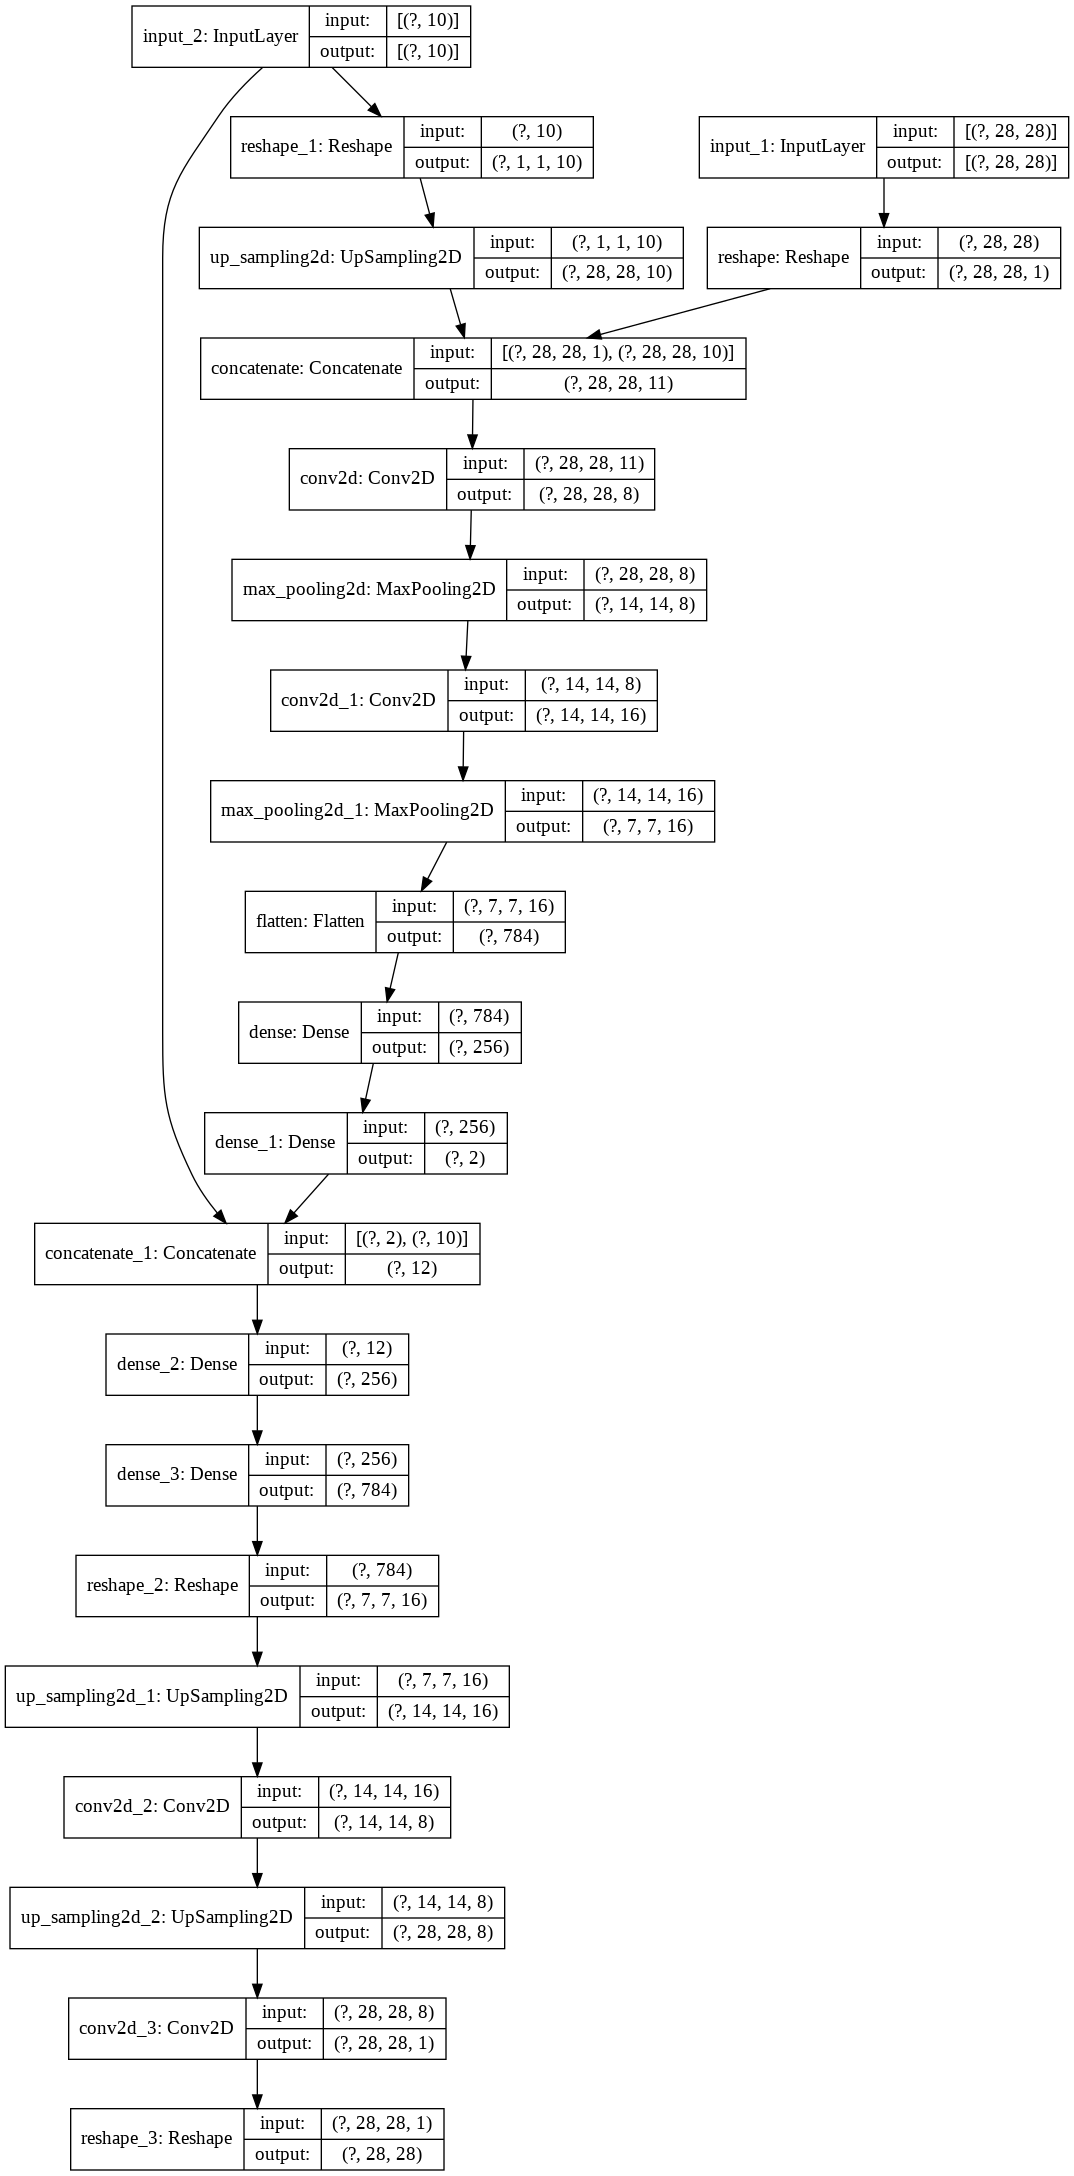

In [0]:
ae.summary()
tf.keras.utils.plot_model(ae, 'ae.png', show_shapes=True)

## 오토인코더 인스턴스 트레이닝

AutoEncoder 인스턴스 ae에 대한 훈련 수행
* 인스턴스 ae를 [compile](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile)
  + cf) shader program 컴파일과 유사하게 이해해도 됨
  + 이때, 훈련에 활용될 [optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers), [loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses), [metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) 등을 지정함
  + Optmizer에 대한 이론적 내용은 [이곳](https://brunch.co.kr/@chris-song/50)을 참고하세요.
* 훈련 데이터 쌍 (train_images, train_labels)으로 fit()을 이용해 훈련 


In [0]:
ae.compile(optimizer='adam',
           loss='mse',
           metrics=['mae'])

In [0]:
epochs = 20
batch_size = 100
ae.fit([train_images, train_label_onehots], train_images, epochs=epochs, batch_size=batch_size)

Epoch 1/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0612 - mae: 0.1377
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0387 - mae: 0.0929
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0362 - mae: 0.0873
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0352 - mae: 0.0851
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0345 - mae: 0.0836
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0340 - mae: 0.0825
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0336 - mae: 0.0818
Epoch 8/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0334 - mae: 0.0814
Epoch 9/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0332 - mae: 0.0811
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0331 - mae: 0.0808
Epoch 11/20
600/600 [============================

## 트레이닝이 끝난 오토인코더를 이용하기
트레이닝이 끝난 오토인코더는 함수로서 작동이 가능하다. 

In [0]:
results = ae([train_images, train_label_onehots])

In [0]:
# 학습된 ae가 생성한 MNIST 데이터 가시화
import ipywidgets as widgets

def io_imshow(idx):
  print('GT label:', train_labels[idx])
  plt.subplot(121)
  plt.imshow(train_images[idx])
  plt.subplot(122)
  plt.imshow(results[idx])
  plt.show()

widgets.interact(io_imshow, idx=widgets.IntSlider(min=0, max=train_images.shape[0]-1, continuous_update=False));

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=59999), Output()), _d…

# 인코더를 이용한 압축 Model 구성
## 인코더 부분을 따로 모델로 설정하기
다음과 같은 방법으로 트레이닝이 끝난 조건부 오토인코더의 인코더를 모델로서 활용할 수 있다.
* Input으로는 [train_image(shape: (28,28)), 원하는 condition의 onehot vector(shape: (10,)]를 넣어주면 된다.

In [0]:
enc_img = enc_reshape(img)                           
enc_con = con_reshape(con)                           
enc_con = enc_upsampling(enc_con)

x_enc = tf.keras.layers.concatenate([enc_img, enc_con])
x_enc = enc_conv_1(x_enc)
x_enc = enc_maxpool_1(x_enc)
x_enc = enc_conv_2(x_enc)
x_enc = enc_maxpool_2(x_enc)
x_enc = tf.keras.layers.Flatten()(x_enc)
x_enc = enc_dense_1(x_enc)
z_enc = enc_dense_2(x_enc)

cond_encoder = models.Model([img, con], z_enc)

##인코딩 결과 확인
* 특정 이미지에 대한 인코딩 결과를 확인한다.


In [0]:
enc_result = cond_encoder([train_images, train_label_onehots])

In [0]:
import ipywidgets as widgets

def z_show(idx):
  print(enc_result[idx])
  print('GT label:', train_labels[idx])

widgets.interact(z_show, idx=widgets.IntSlider(min=0, max=train_images.shape[0]-1));

interactive(children=(IntSlider(value=0, description='idx', max=59999), Output()), _dom_classes=('widget-inter…

## 인코딩 결과 가시화
오토인코더의 encoder가 만들어 내는 representation인 condition에 따라 z 값을 label별로 가시화 한다. 

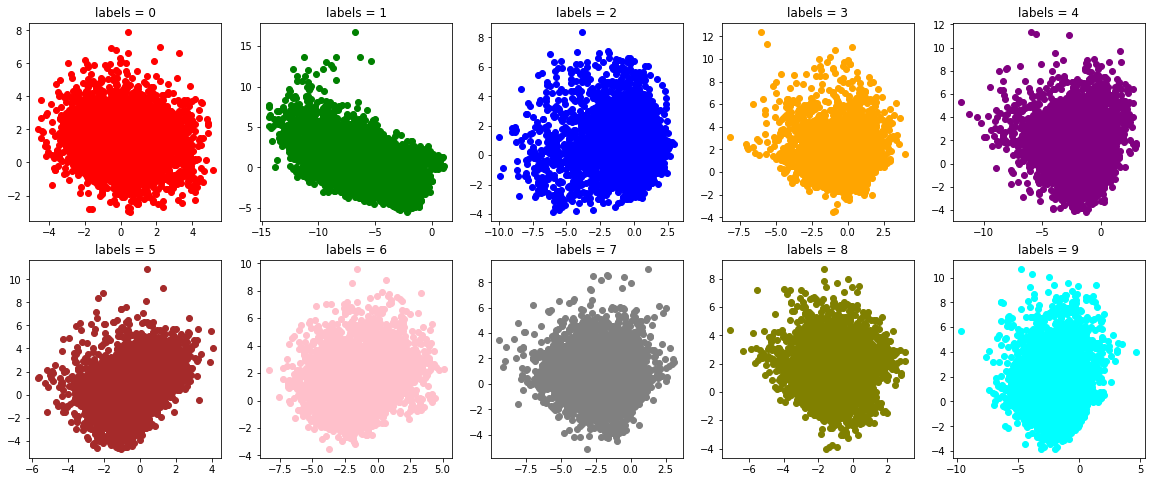

In [0]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,8))

colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for i in range(10):
  z_graph = enc_result[train_labels == i]
  ax = fig.add_subplot(2,5,i+1)
  ax.title.set_text('labels = ' + str(i))
  ax.scatter(z_graph[:, 0], z_graph[:, 1], c = colors[i])

# 디코더를 이용한 Generative Model 구성
## 디코더 부분을 따로 모델로 설정하기
다음과 같은 방법으로 트레이닝이 끝난 조건부 오토인코더의 디코더를 모델로서 활용할 수 있다.
* Input으로는 [encoder결과값(shape: (2,)), 원하는 condition의 onehot vector(shape: (10,)]를 넣어주면 된다
* encoder의 결과값은 np.arrary([[float a,float b]])의 형태를 한다.
  + ex) [-1.2, 0.2]
* 원하는 condition의 onehot vector는 condtion이 10개 이므로 np.array([[float a1, a2, a3, ... , a8, a9]])의 형태를 한다.
  + ex) label = 0 -> [1.0, 0.0, 0,0, ... , 0.0, 0,0]

In [0]:
## input layer (special purposes for conditional generative model)
z_sample = layers.Input(shape=(n_dim,))

## conditional generative model
z_cond = layers.concatenate([z_sample, con])
x_dec = dec_dense_1(z_cond)
x_dec = dec_dense_2(x_dec)
x_dec = dec_reshape(x_dec)
x_dec = dec_upsampling_1(x_dec)
x_dec = dec_conv_1(x_dec)
x_dec = dec_upsampling_2(x_dec)
x_dec = dec_conv_2(x_dec)
y_dec_pred = dec_reshape_2(x_dec)

cond_decoder = models.Model([z_sample, con], y_dec_pred)

## 디코딩 결과 확인
* 인코딩 결과와 유사한 좌표값을 디코딩에 보내도 유사한 결과가 나옴을 확인한다.
* Label값을 조정해서 원하는 숫자의 분포에서 디코딩 결과를 확인할 수 있다.

In [0]:
## 디코더의 테스트 입력 설정

import ipywidgets as widgets

u=widgets.FloatSlider(min=-5.0, max=5.0)
v=widgets.FloatSlider(min=-5.0, max=5.0)
num=widgets.IntSlider(min=0, max=9)

ui = widgets.HBox([num,u,v])

def z_test(num, u, v):
  z_test = np.array([[u,v]])  
  test = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
  test[0][num] = 1.0
  c_test= test
  print('train data label: ', num)
  print('label\'s onehot code: ',c_test)
  print('u: ',z_test[0][0], ' ', 'v: ',z_test[0][1])

  img_gen = cond_decoder([z_test, c_test])
  plt.imshow(img_gen[0])
  plt.show()  

out = widgets.interactive_output(z_test, {'num':num, 'u': u, 'v': v})

display(ui, out)

Output()

##Condition을 섞어서 새로운 숫자 만들기
* 디코딩한 결과값의 condition을 섞어서 새로운 숫자를 만들 수 있다.
* 왼쪽 슬라이드로 넣고 싶은 condition을 선택할 수 있다.
* 오른쪽 슬라이드를 통해 넣고 싶은 condition을 On 또는 Off를 할 수 있다.
* 이것을 통해 새로운 그림을 생성할 수 있다.

In [0]:
## 디코더의 테스트 입력 설정

import ipywidgets as widgets

on_off=widgets.IntSlider(min=0, max=1)
num=widgets.IntSlider(min=0, max=9)

ui = widgets.HBox([num,on_off])
test = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

def z_test(num, on_off):
  z_test = np.array([[0,0]])  
  test[0][num] = on_off
  c_test= test
  print('label\'s onehot code: ',c_test)

  img_gen = cond_decoder([z_test, c_test])
  plt.imshow(img_gen[0])
  plt.show()

out = widgets.interactive_output(z_test, {'num':num, 'on_off': on_off})

display(ui, out)

Output()

## 차원 늘리기
n_dim을 2에서 7로 늘려본다.

In [0]:
n_dim=7

#인코더 모델 정의

In [0]:

img = tf.keras.Input(shape=(28,28)) # TF 1.x의 placeholder 역할
con = tf.keras.Input(shape=(10,))   # TF 1.x의 placeholder 역할

enc_conv_1 = tf.keras.layers.Conv2D(8,(2,2), activation='relu', padding='same')
enc_conv_2 = tf.keras.layers.Conv2D(16,(2,2), activation='relu', padding ='same')

enc_maxpool_1 = tf.keras.layers.MaxPooling2D((2,2), padding='same')
enc_maxpool_2 = tf.keras.layers.MaxPooling2D((2,2), padding='same')

enc_dense_1 = tf.keras.layers.Dense(256, activation='relu')
enc_dense_2 = tf.keras.layers.Dense(n_dim)

enc_reshape = tf.keras.layers.Reshape((28,28,1))
con_reshape = tf.keras.layers.Reshape((1,1,10))

enc_upsampling = tf.keras.layers.UpSampling2D((28,28))

enc_img = enc_reshape(img)                            # img(28*28) -> (28,28,1)
enc_con = con_reshape(con)                            # con(10,) -> enc_con(1,1,10)
enc_con = enc_upsampling(enc_con)                     # enc_con(1,1,10) -> (28,28,10)

x = tf.keras.layers.concatenate([enc_img, enc_con])   # (28,28,1)+(28,28,10) -> (28,28,11)
x = enc_conv_1(x)
x = enc_maxpool_1(x)
x = enc_conv_2(x)
x = enc_maxpool_2(x)
x = tf.keras.layers.Flatten()(x)
x = enc_dense_1(x)
z = enc_dense_2(x)

#디코더 모델 정의

In [0]:
dec_dense_1 = tf.keras.layers.Dense(256, activation='relu')
dec_dense_2 = tf.keras.layers.Dense(784, activation='relu')

dec_conv_1 = tf.keras.layers.Conv2D(8,(2,2), activation='relu', padding='same')
dec_conv_2 = tf.keras.layers.Conv2D(1,(2,2), activation='sigmoid', padding='same')

dec_upsampling_1 = tf.keras.layers.UpSampling2D((2,2))
dec_upsampling_2 = tf.keras.layers.UpSampling2D((2,2))

dec_reshape = tf.keras.layers.Reshape(target_shape=(7,7,16))
dec_reshape_2 = tf.keras.layers.Reshape(target_shape=(28,28))

x = tf.keras.layers.concatenate([7, con])     # z(7,) + con(10,) -> (12,)
x = dec_dense_1(x)
x = dec_dense_2(x)
x = dec_reshape(x)
x = dec_upsampling_1(x)
x = dec_conv_1(x)
x = dec_upsampling_2(x)
x = dec_conv_2(x)
y_pred = dec_reshape_2(x)

#AutoEncoder 모델 정의

In [0]:
ae = tf.keras.Model(inputs=[img, con], outputs=y_pred)

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
reshape_5 (Reshape)             (None, 1, 1, 10)     0           input_7[0][0]                    
__________________________________________________________________________________________________
reshape_4 (Reshape)             (None, 28, 28, 1)    0           input_6[0][0]                    
____________________________________________________________________________________________

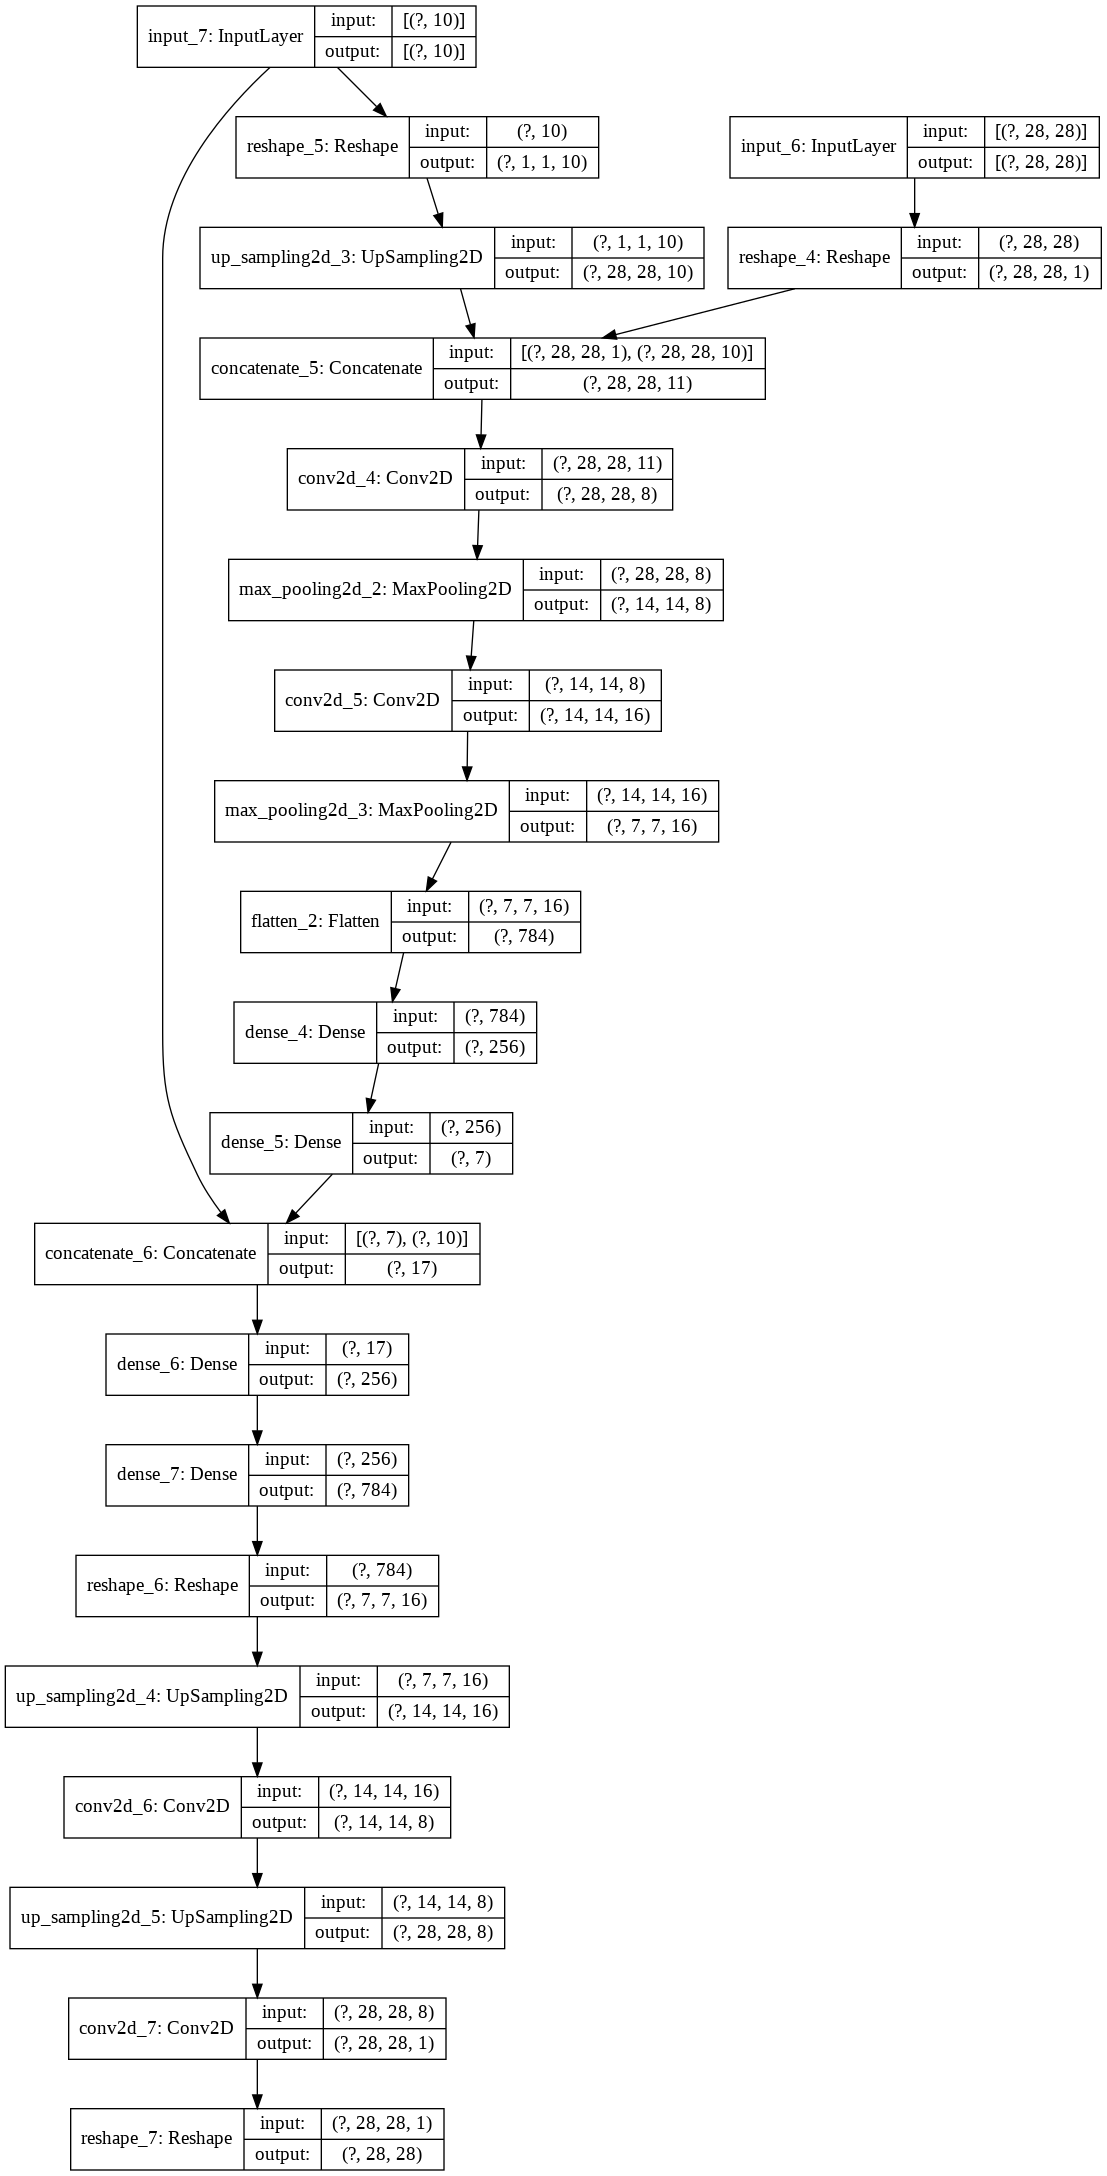

In [0]:
ae.summary()
tf.keras.utils.plot_model(ae, 'ae.png', show_shapes=True)

#네트워크 학습

In [0]:
ae.compile(optimizer='adam',
           loss='mse',
           metrics=['mae'])

In [0]:
epochs = 20
batch_size = 100
ae.fit([train_images, train_label_onehots], train_images, epochs=epochs, batch_size=batch_size)

Epoch 1/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0476 - mae: 0.1083
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0254 - mae: 0.0658
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0224 - mae: 0.0595
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0208 - mae: 0.0563
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0198 - mae: 0.0541
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0190 - mae: 0.0524
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0183 - mae: 0.0509
Epoch 8/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0178 - mae: 0.0498
Epoch 9/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0174 - mae: 0.0489
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0171 - mae: 0.0483
Epoch 11/20
600/600 [============================

#학습된 결과 확인
* n_dim=2일 때에 비해 정보손실이 적기 때문에 더 좋은 결과가 나온다.

In [0]:
results = ae([train_images, train_label_onehots])

In [0]:
# 학습된 ae가 생성한 MNIST 데이터 가시화
import ipywidgets as widgets

def io_imshow(idx):
  print('GT label:', train_labels[idx])
  plt.subplot(121)
  plt.imshow(train_images[idx])
  plt.subplot(122)
  plt.imshow(results[idx])
  plt.show()

widgets.interact(io_imshow, idx=widgets.IntSlider(min=0, max=train_images.shape[0]-1, continuous_update=False));

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=59999), Output()), _d…

# 인코더를 이용한 압축 Model 구성
## 인코더 부분을 따로 모델로 설정하기
다음과 같은 방법으로 트레이닝이 끝난 조건부 오토인코더의 인코더를 모델로서 활용할 수 있다.

In [0]:
enc_img = enc_reshape(img)                           
enc_con = con_reshape(con)                           
enc_con = enc_upsampling(enc_con)

x_enc = tf.keras.layers.concatenate([enc_img, enc_con])
x_enc = enc_conv_1(x_enc)
x_enc = enc_maxpool_1(x_enc)
x_enc = enc_conv_2(x_enc)
x_enc = enc_maxpool_2(x_enc)
x_enc = tf.keras.layers.Flatten()(x_enc)
x_enc = enc_dense_1(x_enc)
z_enc = enc_dense_2(x_enc)

cond_encoder = models.Model([img, con], z_enc)

In [0]:
enc_result = cond_encoder([train_images, train_label_onehots])

#TSNE를 통해 인코더 결과값(n_dim=7) 분포 가시화
* n_dim = 7인 고차원의 데이터를 차원축소를 통해 가시화

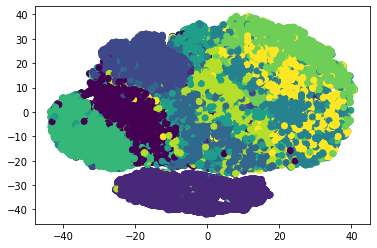

In [0]:
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
transformed = model.fit_transform(enc_result)

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=train_labels)

plt.show()



#TSNE 분포를 Label별로 분리 후 가시화
* n_dim=2일 때와 정보가 많아 다양하게 분포되어 있는 것을 확인할 수 있다.

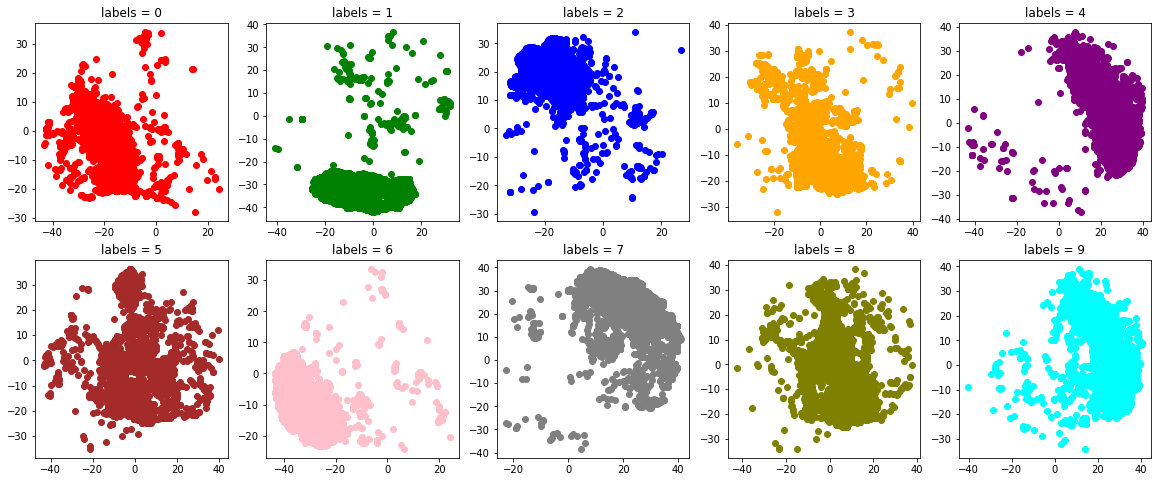

In [0]:
fig = plt.figure(figsize = (20,8))

colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for i in range(10):
  z_graph = transformed[train_labels == i]
  ax = fig.add_subplot(2,5,i+1)
  ax.title.set_text('labels = ' + str(i))
  ax.scatter(z_graph[:, 0], z_graph[:, 1], c = colors[i])